In [98]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Set visualization style
sns.set_style('whitegrid')

In [99]:
df = pd.read_csv("BankChurners.csv")

In [100]:
# fix feature name
df = df.rename(columns={
    'CLIENTNUM': 'Client_Num',
    'Dependent_count': 'Dependent_Count',
    'Months_on_book': 'Months_on_Book',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2'
})

df.head()

,Client_Num,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1,Naive_Bayes_Classifier_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [101]:
df.isnull().sum()

Client_Num                  0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_Count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_Book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_Classifier_1    0
Naive_Bayes_Classifier_2    0
dtype: int64

In [102]:
df = df.drop(['Client_Num'], axis=1)

In [103]:
#remove unknown values
df = df[~(df['Education_Level'] == 'Unknown')]
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [104]:
df = df[~(df['Marital_Status'] == 'Unknown')]
df['Marital_Status'].value_counts()

Married     3999
Single      3322
Divorced     652
Name: Marital_Status, dtype: int64

In [105]:
df = df[~(df['Income_Category'] == 'Unknown')]
df['Income_Category'].value_counts()


Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: Income_Category, dtype: int64

In [106]:
# Tranform Categorical Feature
#df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
df = pd.get_dummies(df, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

# Scaling Numerical feature
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Customer_Age', 
                                           'Dependent_Count', 
                                           'Months_on_Book', 
                                           'Total_Relationship_Count',
                                           'Months_Inactive_12_mon', 
                                           'Contacts_Count_12_mon', 
                                           'Credit_Limit',
                                           'Total_Revolving_Bal', 
                                           'Avg_Open_To_Buy', 
                                           'Total_Amt_Chng_Q4_Q1',
                                           'Total_Trans_Amt', 
                                           'Total_Trans_Ct', 
                                           'Total_Ct_Chng_Q4_Q1',
                                           'Avg_Utilization_Ratio']])

df_scaled = pd.DataFrame(scaled_features, columns=['Customer_Age', 
                                                   'Dependent_Count', 
                                                   'Months_on_Book', 
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon', 
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal', 
                                                   'Avg_Open_To_Buy', 
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt', 
                                                   'Total_Trans_Ct', 
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])

df.drop(['Customer_Age', 'Dependent_Count', 'Months_on_Book', 'Total_Relationship_Count',
         'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
         'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
         'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
         'Avg_Utilization_Ratio','Naive_Bayes_Classifier_1','Naive_Bayes_Classifier_2'], axis=1, inplace=True)

df_scaled = df_scaled.reset_index(drop=True)
df = df.reset_index(drop=True)

df = pd.concat([df, df_scaled], axis=1)

In [107]:
df.shape

(7081, 30)

In [108]:
df.dtypes

Attrition_Flag                     object
Gender                              int64
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Marital_Status_Married              uint8
Marital_Status_Single               uint8
Income_Category_$40K - $60K         uint8
Income_Category_$60K - $80K         uint8
Income_Category_$80K - $120K        uint8
Income_Category_Less than $40K      uint8
Card_Category_Gold                  uint8
Card_Category_Platinum              uint8
Card_Category_Silver                uint8
Customer_Age                      float64
Dependent_Count                   float64
Months_on_Book                    float64
Total_Relationship_Count          float64
Months_Inactive_12_mon            float64
Contacts_Count_12_mon             float64
Credit_Limit                      float64
Total_Revolving_Bal               

Task 1: Drop Class Label

In [109]:
# Task 1
df1 = df.drop('Attrition_Flag', axis=1)

Task 2: K-Means Clustering

In [110]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(df1)
df1['labels_2']=kmeans_2.predict(df1)

kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(df1)
df1['labels_3']=kmeans_3.predict(df1)

kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(df1)
df1['labels_4']=kmeans_4.predict(df1)

kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(df1)
df1['labels_5']=kmeans_5.predict(df1)

print("Inertia for 2 clusters: " + str(kmeans_2.inertia_))
print("Inertia for 3 clusters: " + str(kmeans_3.inertia_))
print("Inertia for 4 clusters: " + str(kmeans_4.inertia_))
print("Inertia for 5 clusters: " + str(kmeans_5.inertia_))

df1.head(5)

Inertia for 2 clusters: 100967.93782446811
Inertia for 3 clusters: 93136.90121336203
Inertia for 4 clusters: 87451.62312162246
Inertia for 5 clusters: 83319.6246538922


,Gender,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Customer_Age,Dependent_Count,Months_on_Book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,labels_2,labels_3,labels_4,labels_5
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,-0.167610,0.512710,0.377234,0.764487,-1.349309,0.493777,0.460058,-0.480760,0.502567,2.574433,-0.937167,-0.945214,3.827331,-0.794057,0,1,0,4
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0.329862,2.061228,1.002074,1.412015,-1.349309,-0.411332,-0.025947,-0.373652,0.007308,3.497689,-0.894783,-1.323244,12.579779,-0.636187,0,2,2,1
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0.578598,0.512710,0.002330,0.116959,-1.349309,-2.221550,-0.556114,-1.437353,-0.427933,8.217051,-0.722936,-1.869287,6.793694,-1.012921,0,2,2,1
3,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,-0.789449,0.512710,-1.872192,0.764487,-1.349309,-2.221550,-0.413874,-1.437353,-0.285773,6.339166,-1.031741,-1.533260,7.493388,-1.012921,0,2,2,1
4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,-0.291978,-0.261549,0.002330,-0.530569,-1.349309,-0.411332,-0.491240,0.097873,-0.499670,2.758188,-0.953314,-1.701273,0.563494,0.102927,0,2,2,1


Task 3: Creating an Elbow Plot to find the best k

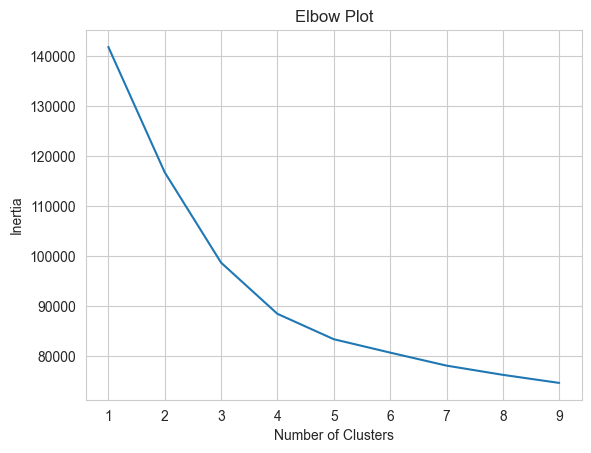

In [111]:
#inertia plot
inertia = []
for i in range(1, 10): 
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

Using the elbow plot above, we conclude that 4 is the best value for k.

Lets find the optimal number of clusters(k) based on silhouette score.

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of K values to try
k_range = range(2, 6)

# Initialize variables to store results
best_score = -1
best_k = -1

# Loop over K values and compute silhouette scores
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df1)
    score = silhouette_score(df1, cluster_labels)
    
    # Update best score and K if needed
    if score > best_score:
        best_score = score
        best_k = k

# Print results
print(f"Optimal number of clusters = {best_k}")
print(f"Silhouette score = {best_score}")

Optimal number of clusters = 4
Silhouette score = 0.2391025126922504


Cross-validation method to find optimal number of clusters.

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Extract features and labels
X = df1
y = df["Attrition_Flag"]

# Convert string labels to integer labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of K values to try
k_range = range(2, 6)

# Initialize variables to store results
best_accuracy = -1
best_k = -1

# Loop over K values and compute accuracy scores using cross-validation
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Update best accuracy and K if needed
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Print results
print(f"Optimal number of clusters = {best_k}")
print(f"Cross-validation accuracy = {best_accuracy}")

Optimal number of clusters = 2
Cross-validation accuracy = 0.5956245589273113


In [114]:
# Finding Silhouette Score for 2 clusters

kmeans = KMeans(n_clusters= 2, random_state=42)
cluster_labels = kmeans.fit_predict(df1)
score = silhouette_score(df1, cluster_labels)

print(f"Silhouette score for best k from supervised learning = {score}")

Silhouette score for best k from supervised learning = 0.1832721220393462


Using the elbow plot, we find the optimal number of clusters is 4. However, when using a supervised method to find the best k-value, we find the optimal number of clusters is 2. 

The silhouette score was higher for k=4, so we recommend using 4 clusters.

Task 4: Hierarchical Clustering

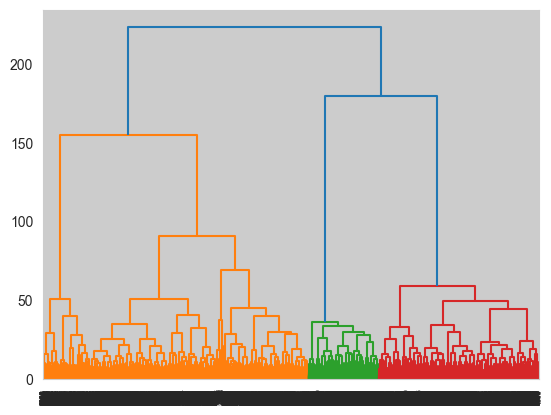

In [115]:
#task 4: hierarchical clustering

Z = linkage(df1,method='ward', metric='euclidean', optimal_ordering=False)
#fcluster(Z, 5, criterion='maxclust')

dn = dendrogram(Z)
plt.show()

Lets compare kmeans and dendrogram

In [116]:
labels = fcluster(Z, t=4, criterion='maxclust')
score = silhouette_score(df1, labels)
print('Silhouette score:', score)

Silhouette score: 0.23779675057301516


Here we can see kmeans and dendogram have similar silhouette scores. Thus, either method can be used to cluster the data.